In [6]:
import numpy as np
import re
import matplotlib
from matplotlib import pyplot as plt
import sys
import os

%matplotlib inline

In [18]:
# pdfs to work on
sample_pdf_dir = 'sample_pdfs'
sample_pdfs = [file for file in os.listdir(sample_pdf_dir) if file.split('.')[-1] == 'pdf']
output_dir = 'output'

In [16]:
# Shitty experiments with pdftotext
import pdftotext


# Load your PDF
with open(os.path.join(sample_pdf_dir, '2019.pdf'), "rb") as f:
    pdf = pdftotext.PDF(f)

# How many pages?
# print(len(pdf))

# Iterate over all the pages
for i, page in enumerate(pdf):
#     page = re.sub(page, r'\n+', r'\n')
    page = re.sub(r'[ \t]+', ' ', page)
    print('\n\n\n\n\n\nPAGE {}'.format(i + 1), page, '\n')

# Read some individual pages
# print(pdf[0])
# print(pdf[1])

# Read all the text into one string
# print("\n\n".join(pdf)

# print("\n\n".join(pdf))











PAGE 1  Extending Machine Language Models toward
 Human-Level Language Understanding
 James L. McClellanda,b,2 , Felix Hillb,2 , Maja Rudolphc,2 , Jason Baldridged,1,2 , and Hinrich Schützee,1,2
 a
 Stanford University, Stanford, CA 94305, USA; b DeepMind, London N1C 4AG, UK; c Bosch Center for Artificial Intelligence, Renningen, 71272, Germany; d Google Research,
 Austin, TX 78701, USA; e LMU Munich, Munich, 80538, Germany
 This manuscript was compiled on December 13, 2019
 Language is central to human intelligence. We review recent break- phenomenon, captured in learned connection weights and re-
 throughs in machine language processing and consider what re- sulting in context-sensitive, distributed representations whose
 mains to be achieved. Recent approaches rely on domain general characteristics reflect a gradual, input-statistics dependent,
 principles of learning and representation captured in artificial neu- learning process (4). The models treat the symbols and rules
ar

In [15]:
# Shitty experiments with PyPDF2
import PyPDF2


read_pdf = PyPDF2.PdfFileReader(os.path.join(sample_pdf_dir, '2019.pdf'))
number_of_pages = read_pdf.getNumPages()
for i in range(number_of_pages):
    page = read_pdf.getPage(i)
    page_content = page.extractText()
    # print(page_content.encode('utf-8'))
    print(page_content)

The conceptual framework that we bring to the study ofcognition can have profound empirical consequences on the
practice of cognitive science. It influences the phenomena we
choose to study, the questions we ask about these phenom-
ena, the experiments we perform, and the ways in which we
interpret the results of these experiments. Until relatively re-
cently, there was Ôonly one game in townÕ1Ð the computa-tional hypothesis that underlying cognition is the purely
formal manipulation of quasi-linguistic symbolic represen-
tations by syntactic rules1Ð3. However, in the mid-1980s, thetheoretical imagination of cognitive science was significantly
expanded by the proliferation of connectionist models4Ð6.More recently, there has been a growing interest in dynamical
approaches to cognitive science7Ð12. Drawing upon the math-ematical tools of dynamical systems theory (see Box 1), a dy-
namical analysis of a cognitive process seeks to understand the
unfolding of that process over time and the 

To survive on todayÕs highways, a driver must have highly developed skills in visuallyguided collision avoidance. To play such games as cricket, tennis or baseball demands
accurate, precise and reliable collision achievement. This review discusses evidence that
some of these tasks are performed by predicting where an object will be at some sharply
defined instant, several hundred milliseconds in the future, while other tasks are
performed by utilizing the fact that some of our motor actions change what we see in
ways that obey lawful relationships, and can therefore be learned. Several monocular and
binocular visual correlates of the direction of an objectÕs motion relative to the observerÕs
head have been derived theoretically, along with visual correlates of the time to collision
with an approaching object. Although laboratory psychophysics can identify putative
neural mechanisms by showing which of the known correlates are processed by the
human visual system independently of other 

# Pdfminer <3
**attention!** install `pdfminer.six`
```
pip install pdfminer.six
```

In [17]:
from pdfminer.high_level import extract_text
text = extract_text(os.path.join(sample_pdf_dir, '2019.pdf'))
print(text)

9
1
0
2
 
c
e
D
 
2
1
 
 
]
L
C
.
s
c
[
 
 
1
v
7
7
8
5
0
.
2
1
9
1
:
v
i
X
r
a

Extending Machine Language Models toward
Human-Level Language Understanding

James L. McClellanda,b,2, Felix Hillb,2, Maja Rudolphc,2, Jason Baldridged,1,2, and Hinrich Schützee,1,2

aStanford University, Stanford, CA 94305, USA; bDeepMind, London N1C 4AG, UK; cBosch Center for Artiﬁcial Intelligence, Renningen, 71272, Germany; dGoogle Research,
Austin, TX 78701, USA; eLMU Munich, Munich, 80538, Germany

This manuscript was compiled on December 13, 2019

Language is central to human intelligence. We review recent break-
throughs in machine language processing and consider what re-
mains to be achieved. Recent approaches rely on domain general
principles of learning and representation captured in artiﬁcial neu-
ral networks. Most current models, however, focus too closely on
In humans, language is part of a larger system for
language itself.
acquiring, representing, and communicating about objects and sit-


In [23]:
from pdfminer.high_level import extract_text_to_fp

from pdfminer.layout import LAParams
with open(os.path.join(output_dir, '2019.txt'), 'w') as fout:
    with open(os.path.join(sample_pdf_dir, '2019.pdf'), 'rb') as fin:
        txt = extract_text_to_fp(fin, fout, laparams=LAParams(),
                            output_type='text', codec=None)


In [27]:
# based on https://stackoverflow.com/questions/34606382/pdfminer-extract-text-with-its-font-information

from pdfminer.pdfparser import PDFParser
from pdfminer.pdfdocument import PDFDocument
from pdfminer.pdfpage import PDFPage
from pdfminer.pdfinterp import PDFResourceManager
from pdfminer.pdfinterp import PDFPageInterpreter
from pdfminer.layout import LAParams, LTAnno, LTChar, LTFigure, LTPage, LTTextLine, LTTextBox
from pdfminer.converter import PDFPageAggregator

import pdfminer


def createPDFDoc(fpath):
    fp = open(fpath, 'rb')
    parser = PDFParser(fp)
    document = PDFDocument(parser, password='')
    # Check if the document allows text extraction. If not, abort.
    if not document.is_extractable:
        raise "Not extractable"
    else:
        return document


def createDeviceInterpreter():
    rsrcmgr = PDFResourceManager()
    laparams = LAParams()
    device = PDFPageAggregator(rsrcmgr, laparams=laparams)
    interpreter = PDFPageInterpreter(rsrcmgr, device)
    return device, interpreter


In [29]:

# print font info
def parse_obj(objs):
    for obj in objs:
        if isinstance(obj, pdfminer.layout.LTTextBox):
            for o in obj._objs:
                if isinstance(o,pdfminer.layout.LTTextLine):
                    text=o.get_text()
                    if text.strip():
                        for c in  o._objs:
                            if isinstance(c, pdfminer.layout.LTChar):
                                print ("fontname %s"%c.fontname)
        # if it's a container, recurse
        elif isinstance(obj, pdfminer.layout.LTFigure):
            parse_obj(obj._objs)
        else:
            pass


# just print all objects recursively
def parse_obj_rec(obj):
    print(obj)
    if getattr(obj, '_objs', None) is not None:
        objs = obj._objs
        for o in objs:
            parse_obj_rec(o)

textline_children = set()
textbox_children = set()

# check possible types of children of box and line
def get_text_types(obj):
    if getattr(obj, '_objs', None) is not None:
        for o in obj._objs:
            get_text_types(o)
    if isinstance(obj, LTTextBox):
        for o in obj._objs:
            textbox_children.add(type(o))
    elif isinstance(obj, LTTextLine):
        for o in obj._objs:
            textline_children.add(type(o))
            
document=createPDFDoc(os.path.join(sample_pdf_dir, "2019.pdf"))
device,interpreter=createDeviceInterpreter()
pages=PDFPage.create_pages(document)
interpreter.process_page(next(pages))
layout = device.get_result()


get_text_types(layout)
print(textline_children)
print(textbox_children)

parse_obj(layout._objs)
# parse_obj_rec(layout)


{<class 'pdfminer.layout.LTAnno'>, <class 'pdfminer.layout.LTChar'>}
{<class 'pdfminer.layout.LTTextLineHorizontal'>}
fontname Times-Roman
fontname Times-Roman
fontname Times-Roman
fontname Times-Roman
fontname Times-Roman
fontname Times-Roman
fontname Times-Roman
fontname Times-Roman
fontname Times-Roman
fontname Times-Roman
fontname Times-Roman
fontname Times-Roman
fontname Times-Roman
fontname Times-Roman
fontname Times-Roman
fontname Times-Roman
fontname Times-Roman
fontname Times-Roman
fontname Times-Roman
fontname Times-Roman
fontname Times-Roman
fontname Times-Roman
fontname Times-Roman
fontname Times-Roman
fontname Times-Roman
fontname Times-Roman
fontname Times-Roman
fontname Times-Roman
fontname Times-Roman
fontname Times-Roman
fontname Times-Roman
fontname Times-Roman
fontname Times-Roman
fontname Times-Roman
fontname AHPEAI+LMSans10-Bold
fontname AHPEAI+LMSans10-Bold
fontname AHPEAI+LMSans10-Bold
fontname AHPEAI+LMSans10-Bold
fontname AHPEAI+LMSans10-Bold
fontname AHPEAI+LM

fontname OKNUIT+LMRoman9-Regular
fontname OKNUIT+LMRoman9-Regular
fontname OKNUIT+LMRoman9-Regular
fontname OKNUIT+LMRoman9-Regular
fontname OKNUIT+LMRoman9-Regular
fontname OKNUIT+LMRoman9-Regular
fontname OKNUIT+LMRoman9-Regular
fontname OKNUIT+LMRoman9-Regular
fontname OKNUIT+LMRoman9-Regular
fontname OKNUIT+LMRoman9-Regular
fontname OKNUIT+LMRoman9-Regular
fontname OKNUIT+LMRoman9-Regular
fontname OKNUIT+LMRoman9-Regular
fontname OKNUIT+LMRoman9-Regular
fontname OKNUIT+LMRoman9-Regular
fontname OKNUIT+LMRoman9-Regular
fontname OKNUIT+LMRoman9-Regular
fontname OKNUIT+LMRoman9-Regular
fontname OKNUIT+LMRoman9-Regular
fontname OKNUIT+LMRoman9-Regular
fontname OKNUIT+LMRoman9-Regular
fontname OKNUIT+LMRoman9-Regular
fontname OKNUIT+LMRoman9-Regular
fontname OKNUIT+LMRoman9-Regular
fontname OKNUIT+LMRoman9-Regular
fontname OKNUIT+LMRoman9-Regular
fontname OKNUIT+LMRoman9-Regular
fontname OKNUIT+LMRoman9-Regular
fontname OKNUIT+LMRoman9-Regular
fontname OKNUIT+LMRoman9-Regular
fontname O

fontname OKNUIT+LMRoman9-Regular
fontname OKNUIT+LMRoman9-Regular
fontname OKNUIT+LMRoman9-Regular
fontname OKNUIT+LMRoman9-Regular
fontname OKNUIT+LMRoman9-Regular
fontname OKNUIT+LMRoman9-Regular
fontname OKNUIT+LMRoman9-Regular
fontname OKNUIT+LMRoman9-Regular
fontname OKNUIT+LMRoman9-Regular
fontname OKNUIT+LMRoman9-Regular
fontname OKNUIT+LMRoman9-Regular
fontname OKNUIT+LMRoman9-Regular
fontname OKNUIT+LMRoman9-Regular
fontname OKNUIT+LMRoman9-Regular
fontname OKNUIT+LMRoman9-Regular
fontname OKNUIT+LMRoman9-Regular
fontname OKNUIT+LMRoman9-Regular
fontname OKNUIT+LMRoman9-Regular
fontname OKNUIT+LMRoman9-Regular
fontname OKNUIT+LMRoman9-Regular
fontname OKNUIT+LMRoman9-Regular
fontname OKNUIT+LMRoman9-Regular
fontname OKNUIT+LMRoman9-Regular
fontname OKNUIT+LMRoman9-Regular
fontname OKNUIT+LMRoman9-Regular
fontname OKNUIT+LMRoman9-Regular
fontname OKNUIT+LMRoman9-Regular
fontname OKNUIT+LMRoman9-Regular
fontname OKNUIT+LMRoman9-Regular
fontname OKNUIT+LMRoman9-Regular
fontname O

In [34]:
from collections import deque, Counter

def is_exception(char):
    if isinstance(char, LTAnno):
        return True
    # include any math symbols: based on the characters themselves or the font
    if re.match(r'[`\-\]~!@#$%^&*()_+[\\{}|;:",./<>?0-9\']', char._text) is not None:
#         print(char)
        return True
    
    if re.match(r'^\S*\+\S*[Mm]ath\S+-\S+$', char.fontname) is not None:
        return True
    return False

# transform pdfminer object hierarchy to a tree of objects suited to our purposes
def search_for_text(obj):
    if isinstance(obj, LTTextBox):
#         types = set(type(o) for o in obj._objs)
#         print(types)
        return {
            'type': 'box',
            'value': [search_for_text(o) for o in obj._objs]
        }
    elif isinstance(obj, LTTextLine):
        return {
            'type': 'line',
            'value': analyze_line(obj, is_exception)
        }
    elif isinstance(obj, (LTFigure, LTPage)):
        ret = []
        for o in obj._objs:
            text = search_for_text(o)
            if text is not None:
                ret.append(text)
        return ret
    else:
        pass
#         print('rare type', type(obj))

# Merge a sequence of chars into sequence of chunks with the same 
def analyze_line(obj, exception_f=None):
    # elements that pass exception_f(element) will be merged "greedily" into neighbouring chunks
    exception_f = exception_f or (lambda x: True)
    chars = deque(o for o in obj._objs if isinstance(o, LTChar) or isinstance(o, LTAnno))
    
    chunks = deque()
    
    while len(chars) > 0:
        # init chunk criteria
        size = None
        fontname = None
        init = False # whether there is a non-exception regular element in the chunk yet
        chunk = []
        
        while len(chars) > 0:
            c = chars[0]
            if exception_f(c):
                chunk.append(chars.popleft()._text)
                continue

            # first "regular" element
            if not init:
                init = True
                size = c.size
                fontname = c.fontname
                chunk.append(chars.popleft()._text)
                continue

            if (size is None or size == c.size) and (fontname is None or fontname == c.fontname):
                chunk.append(chars.popleft()._text)
            else:
                break
        
        # new chunk
        chunks.append({
            'type': 'chunk',
            'size': size,
            'fontname': fontname,
            'text': ''.join(chunk),
        })
    return tuple(chunks)
               

            
document=createPDFDoc(os.path.join(sample_pdf_dir, "2019.pdf"))
device,interpreter=createDeviceInterpreter()
pages=PDFPage.create_pages(document)

size_counter = Counter()

# print structure and get font size distribution
def print_structure(f, objs):
    for box in objs:
        if box is not None and len(box) > 0:
            assert box['type']=='box'
            for line in box['value']:
        #         print (line)
                assert line['type']=='line'
                for chunk in line['value']:
                    assert chunk['type']=='chunk'
    #                 _ = f.write('font: ' + (chunk['fontname'] if chunk['fontname'] is not None else 'NONE')+ ' ' + chunk['text'] + '\n')
                    _ = f.write(chunk['text'] + '\n')
                    size_counter[chunk['size']] += len(chunk['text'])
    

with open(os.path.join(output_dir, 'text.txt'), 'w') as f:

    for page in pages:
        interpreter.process_page(page)
        layout = device.get_result()
        print_structure(f, search_for_text(layout))
        
        layout = device.get_result()
        structure = search_for_text(layout)
        print_structure(f, structure)

### Idea: find semantics behind char distribution (additional text / figure text etc. / main text / headings)
- take the cluster including the most popular font size as the point of reference and take lower and higher font size clusters as more auxiliary and more summarizing

agglomerative clustering:


https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html#sklearn.cluster.AgglomerativeClustering

#### pros
- constraints on connectivity
- seems to work nicely and create clusters of various sizes

#### cons
- not very fast
- cannot be parallel
- no sample weights (data can only be duplicated)

array([[ 5.83036027],
       [21.9178    ],
       [ 8.91731124]])

Text(0.5, 0, 'font size')

Text(0, 0.5, 'log character counts')

<BarContainer object of 36 artists>

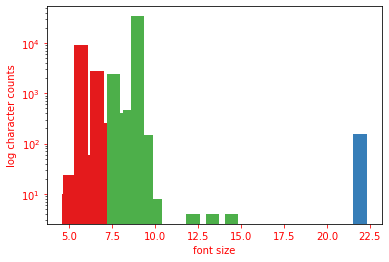

In [35]:
# first fontsize clustering experiments
from sklearn.cluster import KMeans

size_counts = sorted([item for item in size_counter.items() if item[0] is not None], key=lambda x:x[0])
x, y = zip(*size_counts)

kmeans = KMeans(n_clusters=3)
c = kmeans.fit_predict(np.reshape(x, (-1, 1)), sample_weight=y)
kmeans.cluster_centers_

colors = [matplotlib.cm.get_cmap('Set1').colors[label] for label in c] 
fig, ax = plt.subplots()
ax.set_yscale('log')
ax.xaxis.label.set_color('red')
ax.yaxis.label.set_color('red')
ax.tick_params(axis='x', colors='red')
ax.tick_params(axis='y', colors='red')
ax.set_xlabel('font size')
ax.set_ylabel('log character counts')
ax.bar(x, y, color=colors)

In [45]:
# count sizes for a set of pdfs
import os
from collections import Counter

def count_sizes(f, objs, counter):
    for obj in objs:
        if isinstance(obj, dict):
            assert obj['type']=='box'
            for line in obj['value']:
                assert line['type']=='line'
                for chunk in line['value']:
                    assert chunk['type']=='chunk'
                    counter[chunk['size']] += len(chunk['text'])

size_counters = []
for i, pdf in enumerate(sample_pdfs):
    print('{}/{} pdfs'.format(i+1, len(sample_pdfs)), end='\r')
    document=createPDFDoc(os.path.join(sample_pdf_dir, pdf))
    device,interpreter=createDeviceInterpreter()
    pages=PDFPage.create_pages(document)
    
    size_counter = Counter()
    for page in pages:
        interpreter.process_page(page)
        layout = device.get_result()
        structure = search_for_text(layout)
        count_sizes(f, structure, size_counter)
    size_counters.append(size_counter)


In [48]:
def plot_size_clusters(ax, vals, counts, labels, colors=None, title=''):
    ax.set_yscale('log')
    ax.xaxis.label.set_color('red')
    ax.yaxis.label.set_color('red')
    ax.tick_params(axis='x', colors='red')
    ax.tick_params(axis='y', colors='red')
    ax.set_xlabel('font size')
    ax.set_ylabel('log character counts')
    ax.set_title(title + ', all chars: ' + str(np.sum(y)))
    ax.set_xlim(2,35)
    ax.bar(vals, counts, color=colors, width=0.5, alpha=0.8)



[3.16323804 3.02406505 3.53107564 2.95334975]
{0: 3, 1: 1, 2: 0, 3: 2}
{0: 3, 1: 1, 2: 0, 3: 2} (1.9980000000000473, 2.5019999999999527, 2.9969999999999573, 4.5, 5.004000000000019, 5.399999999999977, 5.400000000000034, 5.999999999999943, 6.0, 6.003000000000043, 6.5, 6.500000000000057, 7.0, 7.496999999999957, 7.5, 8.0, 8.000000000000057, 8.999999999999943, 9.0, 12.0, 15.0, 16.0, 24.0, 32.0) [3 3 3 3 3 3 3 3 3 3 3 3 3 1 1 1 1 1 1 0 0 0 2 2]
[3.10396319 2.74205836 3.44312688 3.01522566]
{0: 1, 1: 3, 2: 0, 3: 2}
{0: 1, 1: 3, 2: 0, 3: 2} (4.800000000000011, 4.800000000000068, 6.959999999999994, 6.960000000000008, 7.919999999999959, 7.9199999999999875, 7.920000000000002, 7.920000000000016, 7.920000000000073, 8.879999999999995, 8.88000000000001, 8.880000000000052, 9.840000000000003, 10.799999999999955, 10.799999999999997, 13.919999999999959) [1 1 3 3 3 3 3 3 3 0 0 0 0 0 0 2]


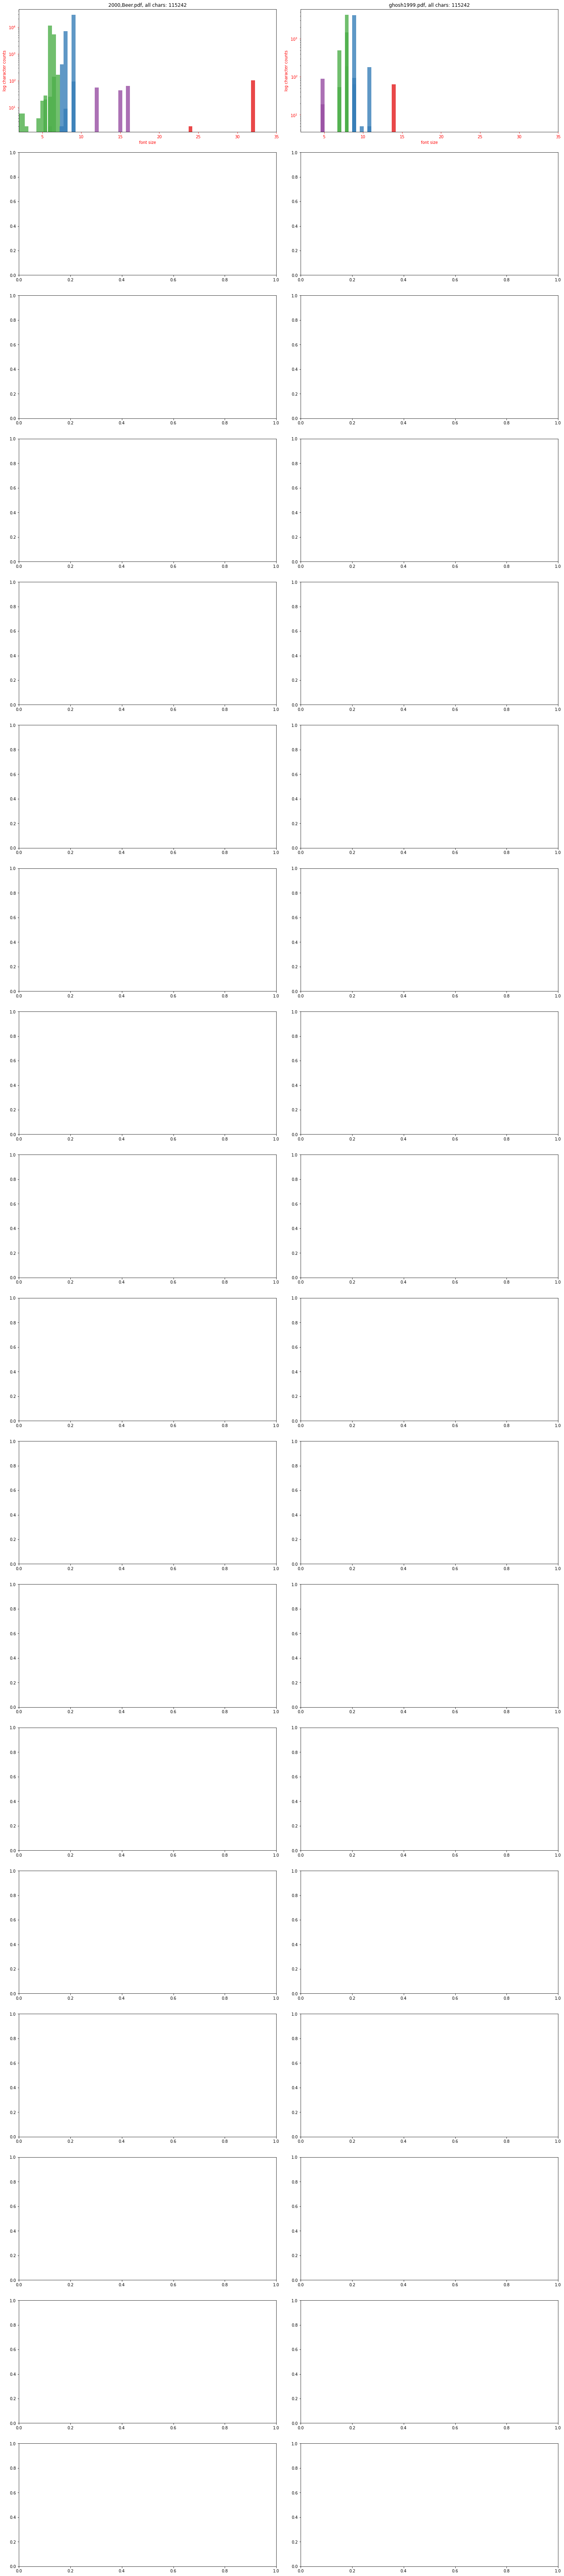

In [57]:
# draw font size histograms for different pdfs
from sklearn.cluster import KMeans
from sklearn.neighbors import kneighbors_graph


n_clusters = 4

# first batch KMeans experiments...
def cluster_sizes_kmeans(vals, counts):
    avg = np.average(vals, weights=counts)
    logvals = np.log2(avg + (vals - avg)/np.std(vals - avg))
    kmeans = KMeans(n_clusters=n_clusters)
    labels = kmeans.fit_predict(np.reshape(logvals, (-1, 1)), sample_weight=counts)
    return kmeans, labels



fig, axes = plt.subplots(int(np.ceil(len(sample_pdfs)/2.)), 2, figsize=(20, 5*len(sample_pdfs)/2))
fig.tight_layout(pad=3.0)
for i, (size_counter, pdf, ax) in enumerate(zip(size_counters, sample_pdfs, axes.flatten())):
    print('{}/{} pdfs'.format(i+1, len(sample_pdfs)), end='\r')
    size_counts = sorted([item for item in size_counter.items() if item[0] is not None], key=lambda x:x[0])
    vals, counts = zip(*size_counts)
    kmeans, labels = cluster_sizes_kmeans(vals, counts)
    
    # ensure cluster integer labels raise in the direction of higher font size
    # so all graphs have the same order of colours
    center_indices = np.argsort(kmeans.cluster_centers_.flatten())
    order_fix_map = {label: center_indices[label] for label in range(n_clusters)}
    print(kmeans.cluster_centers_.flatten(), order_fix_map, sep='\n')
    colors = [matplotlib.cm.get_cmap('Set1').colors[order_fix_map[label]] for label in labels] 
    print(order_fix_map, vals, labels)
    plot_size_clusters(ax, vals, counts, labels, colors=colors, title=pdf)



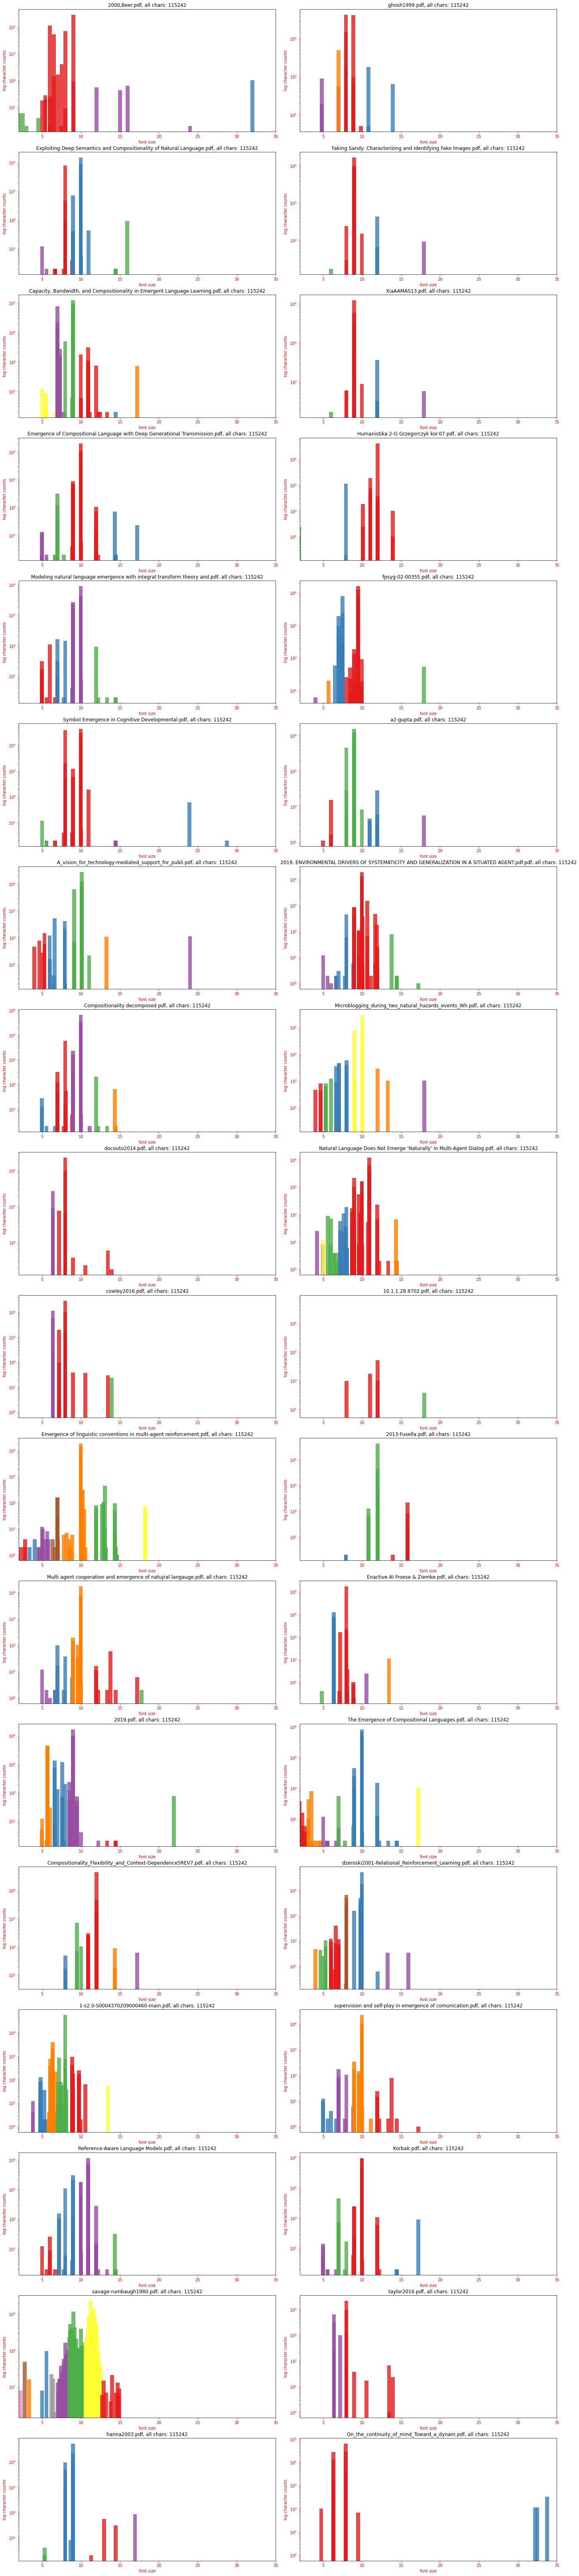

In [59]:
# draw font size histograms for different pdfs
from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import kneighbors_graph

def cluster_sizes_constrained(vals, counts):
    # it gets to steep near sizes 3 - 6 -- shift the sizes slightly up to 8
    # max(0, 8 - np.min(vals)) + 
    
    logvals = np.log2(vals)

    samples = np.reshape(logvals, (-1, 1))
    
    
    # docs:
    # https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html#sklearn.cluster.AgglomerativeClustering
    
    # no sample weights: duplicate samples to reflect somehow the counts 
    # (but not duplicate too much or it will slow down very badly)
    repeat = np.ceil(np.sqrt(counts)).astype(int)
    weighted = np.repeat(samples, repeat, axis=0)
    
    # constrain 1: extreme font size values must not be in the same clusters 
    # (every article has some headings and secondary information like margins / references / captions)
    connectivity = kneighbors_graph(weighted, int(np.round(weighted.shape[0] * 0.7)), include_self=True)
    
    # constrain 2: font sizes fulfilling more or less the same function will vary within a threshold
    # This threshold should be relative to the overall font size variability within an article
    # In some articles even the title is barely larger than the main text
    # In such cases minor differences in font size should allow for distinctions
    distance_threshold = np.std(vals)*0.1
    ac = AgglomerativeClustering(n_clusters=None, 
                                 linkage='average', 
                                 connectivity=connectivity,
                                 distance_threshold=distance_threshold
                                )
    # fit labels to the duplicated data
    skewed_labels = ac.fit_predict(weighted)
#     print(repeat, '\n', np.cumsum(repeat))

    # retrieve the labels for the original (non-duplicated data)
    labels = skewed_labels[np.cumsum(repeat) - repeat[0]]
    return ac, labels

fig, axes = plt.subplots(int(np.ceil(len(sample_pdfs)/2.)), 2, figsize=(20, 5*len(sample_pdfs)/2))
fig.tight_layout(pad=3.0)
for i, (size_counter, pdf, ax) in enumerate(zip(size_counters, sample_pdfs, axes.flatten())):
    print('{}/{} pages'.format(i+1, len(sample_pdfs)), end='\r')
    size_counts = sorted([item for item in size_counter.items() if item[0] is not None], key=lambda x:x[0])
    vals, counts = zip(*size_counts)
    ac, labels = cluster_sizes_constrained(vals, counts)
    
    # ensure cluster integer labels raise in the direction of higher font size
    # so all graphs have the same order of colours

    colors = [matplotlib.cm.get_cmap('Set1').colors[label] for label in labels] 
    
    plot_size_clusters(ax, vals, counts, labels, colors=colors, title=pdf)



In [22]:
# probably most pdf documents don't have outlines...

from pdfminer.pdfparser import PDFParser
from pdfminer.pdfdocument import PDFDocument

# Open a PDF document.
fp = open(os.path.join(sample_pdf_dir, '2019.pdf'), 'rb')
parser = PDFParser(fp)
document = PDFDocument(parser)

# Get the outlines of the document.
outlines = document.get_outlines()
for (level,title,dest,a,se) in outlines:
    print (level, title)

PDFNoOutlines: 